# Задание 10.1.12

# Аналитическое решение задачи теплопроводности

## Формулировка задачи

Рассмотрим уравнение:

$$
-\frac{d}{dx}\left( K(x) \frac{du}{dx} \right) = \frac{1}{x}
$$

с граничными условиями:

$$
u(a) = UA, \quad u(b) = UB
$$

где $a = 1$, $b = 2$, $UA = 3$, $UB = 3$, и $K(x)$ варьируется в зависимости от наборов параметров.

## Решение для каждого набора

### Общий метод решения

1. Переписываем уравнение:

   $$
   \frac{d}{dx}\left( K(x) \frac{du}{dx} \right) = -\frac{1}{x}
   $$

2. Интегрируем обе части:

   После одной интеграции:

   $$
   K(x) \frac{du}{dx} = \int -\frac{1}{x} \, dx = -\ln|x| + C_1
   $$

3. Решаем относительно $u(x)$:

   $$
   \frac{du}{dx} = \frac{-\ln|x| + C_1}{K(x)}
   $$

4. Интегрируем, для каждого из примеров. Интеграл зависит от K(x)

5. Применяем граничные условия для нахождения констант.

### Набор 1: 
$$K(x) = x$$

Для набора 1:

$$
\frac{du}{dx} = \frac{-\ln|x| + C_1}{x}
$$

Интегрируем:

$$
u(x) = \int \frac{-\ln|x| + C_1}{x} \, dx = -\int \frac{\ln|x|}{x} \, dx + C_1\int \frac{1}{x} \, dx
$$

Решая вышеуказанные интегралы:

$$
u(x) = -\frac{(\ln|x|)^2}{2} + C_1 \ln|x| + C_2
$$

Применяем граничные условия:

$$
\begin{align*}
u(1) = 3 \quad &\Rightarrow -\frac{(\ln|1|)^2}{2} + C_1 \ln|1| + C_2 = 3 \\
u(2) = 3 \quad &\Rightarrow -\frac{(\ln|2|)^2}{2} + C_1 \ln|2| + C_2 = 3
\end{align*}
$$

Решаем относительно $C_1$ и $C_2$.

### Пример нахождения $C_1$ и $C_2$ для Набора 1

$$-\frac{(0)^{2}}{2} + C_{1} (0) + C_{2} = 3$$
$$C_{2} = 3$$
$$-\frac{(\ln 2)^{2}}{2} + C_{1} \ln 2 + 3 = 3$$
$$C_{1} \ln 2 = \frac{(\ln 2)^{2}}{2}$$
$$C_{1} = \frac{\ln 2}{2}$$
$$\boxed{C_{1} = \frac{\ln 2}{2}, \quad C_{2} = 3}$$


### Аналогично решаем для других наборов:

- Набор 2: $K(x) = 10x$
- Набор 3: $K(x) = 0.1x$
- Набор 4: $K(x) = \frac{1}{x}$

{Используйте аналогичный процесс интеграции и применения граничных условий для каждого набора, учитывая конкретную форму $K(x)$.}

## Заключение

В этом решении мы рассмотрели изменение функций и интеграцию для нахождения выражения $u(x)$ аналитически, учитывая различные параметры $K(x)$ для всех наборов.

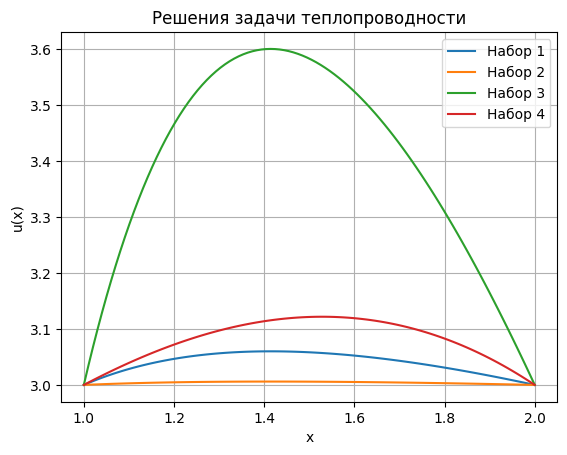

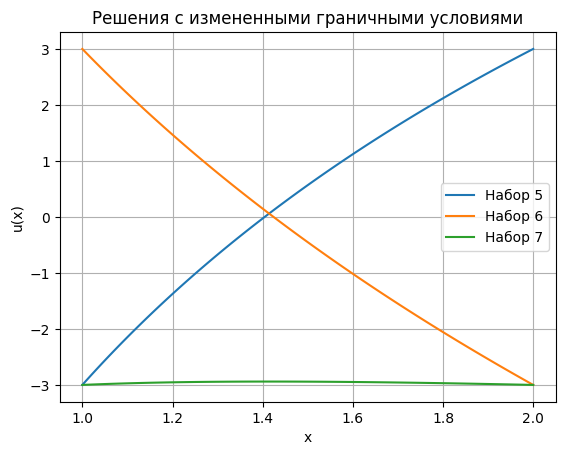

In [27]:
# Решение задачи с использованием Python и LaTeX

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, dsolve, Eq, diff, integrate, solve, lambdify

# Зададим символы и функции
x, C1, C2 = symbols('x C1 C2')
u = Function('u')(x)

# Параметры задачи
a = 1
b = 2
UA = 3
UB = 3

# Наборы параметров
parameter_sets = [
    {"c": 1, "K": x},          # 1 набор
    {"c": 10, "K": 10*x},     # 2 набор
    {"c": 0.1, "K": 0.1*x},   # 3 набор
    {"c": 1, "K": 1/x},       # 4 набор
    # Для 5-7 наборов, где изменяются только граничные условия
]

# Функция f(x)
f_x = 1/x

# Решение для каждого набора
solutions = []
for params in parameter_sets:
    K = params["K"]
    equation = Eq(-diff(K * diff(u, x), x), f_x)
    sol = dsolve(equation)
    constants_eq = [
        Eq(sol.rhs.subs(x, a), UA),
        Eq(sol.rhs.subs(x, b), UB)
    ]
    sol_with_consts = sol.subs(
        {C1: solve(constants_eq, (C1, C2))[C1],
         C2: solve(constants_eq, (C1, C2))[C2]}
    )
    solutions.append(sol_with_consts)

# Построение графиков
x_vals = np.linspace(a, b, 100)
for i, solution in enumerate(solutions):
    u_func = lambdify(x, solution.rhs, 'numpy')
    y_vals = u_func(x_vals)
    plt.plot(x_vals, y_vals, label=f'Набор {i+1}')
    
plt.legend()
plt.title('Решения задачи теплопроводности')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.show()

# Анализ влияния граничных условий для наборов 5-7
boundary_conditions = [
    {"UA": -3, "UB": 3},   # 5 набор
    {"UA": 3, "UB": -3},    # 6 набор
    {"UA": -3, "UB": -3},   # 7 набор
]

solutions_bc = []
for bc in boundary_conditions:
    equation = Eq(-diff(x * diff(u, x), x), f_x)
    sol = dsolve(equation)
    constants_eq = [
        Eq(sol.rhs.subs(x, a), bc["UA"]),
        Eq(sol.rhs.subs(x, b), bc["UB"])
    ]
    sol_with_consts = sol.subs(
        {C1: solve(constants_eq, (C1, C2))[C1],
         C2: solve(constants_eq, (C1, C2))[C2]}
    )
    solutions_bc.append(sol_with_consts)

# Построение графиков для наборов 5-7
for i, solution in enumerate(solutions_bc):
    u_func = lambdify(x, solution.rhs, 'numpy')
    y_vals = u_func(x_vals)
    plt.plot(x_vals, y_vals, label=f'Набор {5+i}')
    
plt.legend()
plt.title('Решения с измененными граничными условиями')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.show()